# Fig 4

## Load the data set obtained from the Stage2-Temporal.R


In [1]:
setwd("/Volumes/Computer Backup/NIMML/Project_NameENISIMSM/data/Fig4-data")
arr <- replicate(4, matrix(sample(1:100),nrow=10,ncol=10), simplify = FALSE)
load('SA_HP_LP_norm_log_3T.Rdata');

arr[[1]] <- data.frame(ST_hat)
load('SA_Mres_LP_norm_log_3T.Rdata');
arr[[2]] <- data.frame(ST_hat)

load('SA_Mreg_LP_norm_log_3T.Rdata');
arr[[3]]<- data.frame(ST_hat)

load('SA_tDC_GLN_norm_log_3T.Rdata');
arr[[4]] <- data.frame(ST_hat)


In [2]:
library(gplots)

label <- c("p_epiinfbctdam", "p_epiTh1dam", "p_epiTh17dam", "p_Epiprolifer.","p_Epicelldeath","p_EpiIL10h",
           "p_nTrep","p_nTdeath","p_allTrep","p_iTregtoTh17","p_Th17toiTreg","p_nTtoTr",
           "p_nTtoiTreg", "p_nTtoTh17","p_Th1death","p_Th17death","p_iTregdeath","p_Trdeath", 
           "p_IL10Tr","dummy","p_Bactkill","p_Bactdeath", "p_HPdeathduetoTcells",
           "p_HPdeath","p_DCdeath","p_Monocytedeath","p_Resmacdeath","p_TrmacKill",
           "p_MregDiff","p_ResmMacrep","p_Monorep","p_IFNg","p_IL10","p_IL17","p_IL21","p_IL6","p_TGFb","p_IL12")

if (!require("RColorBrewer")) {
  install.packages("RColorBrewer")
}
library(RColorBrewer)

library(gridGraphics)
library(grid)

grab_grob <- function(){
  grid.echo()
  grid.grab()
}



Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: RColorBrewer
Loading required package: grid


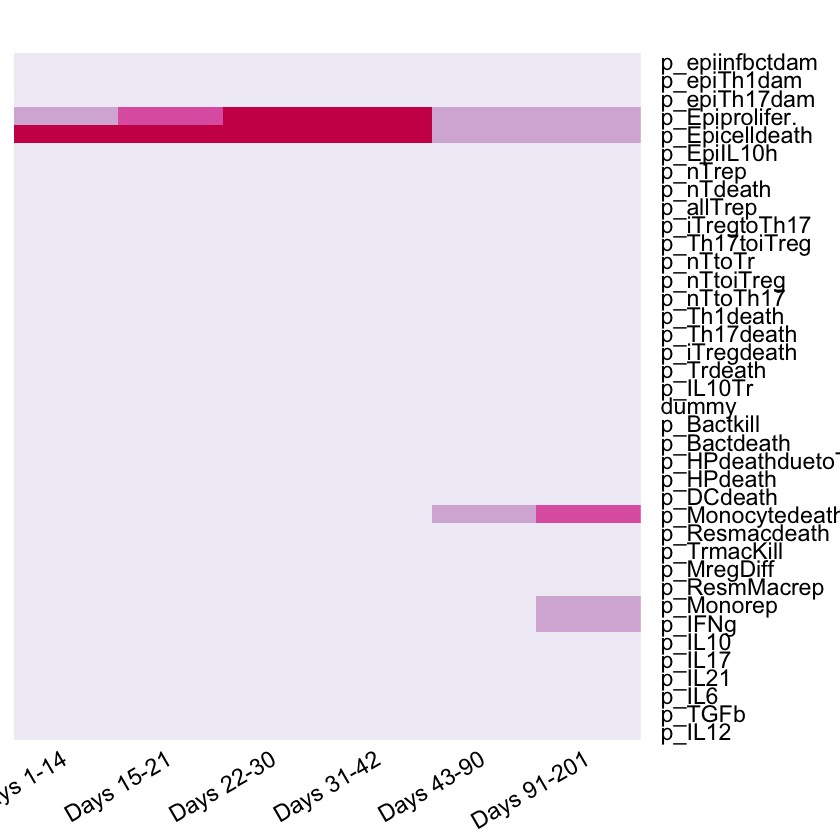

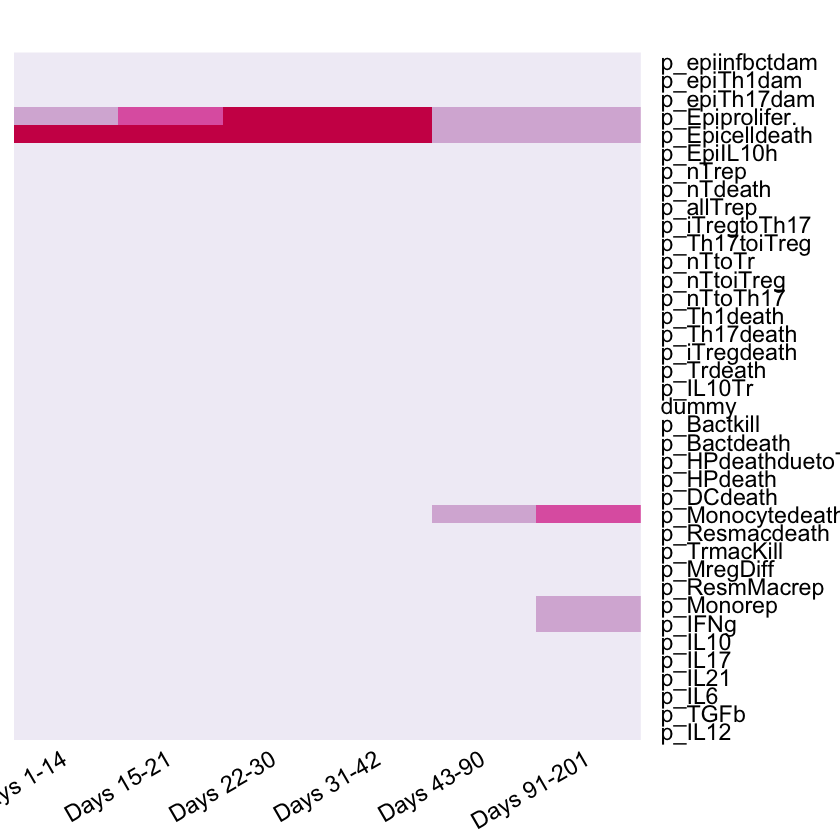

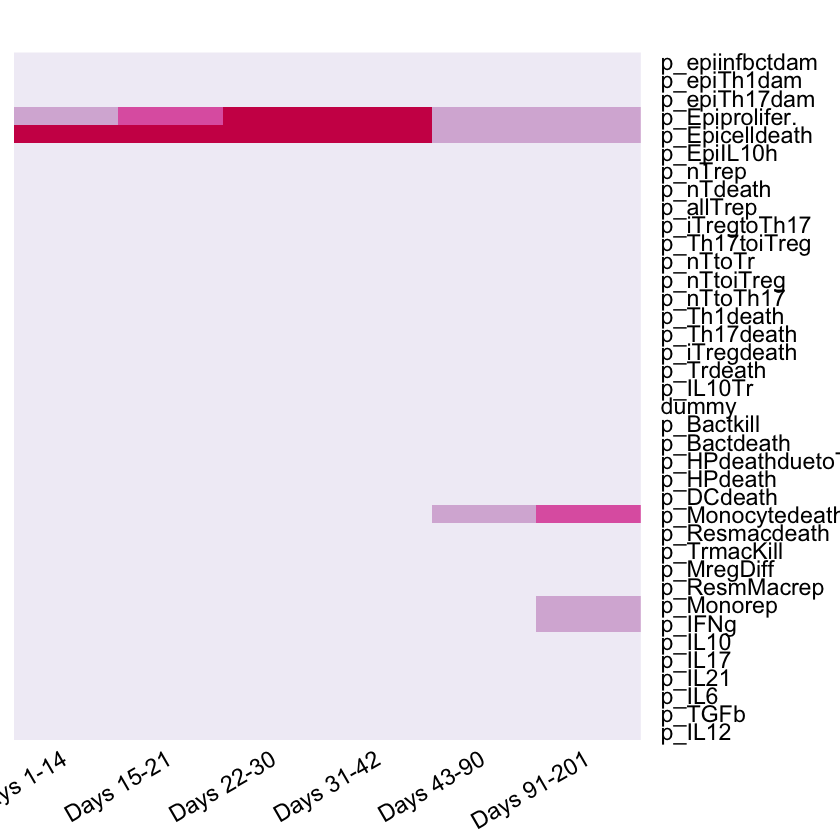

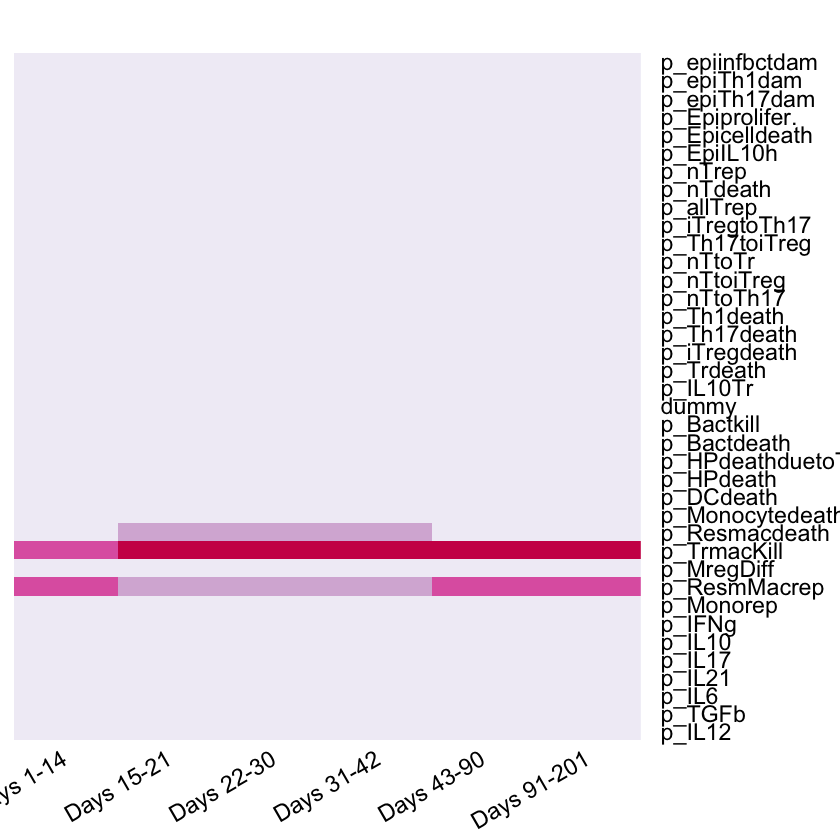

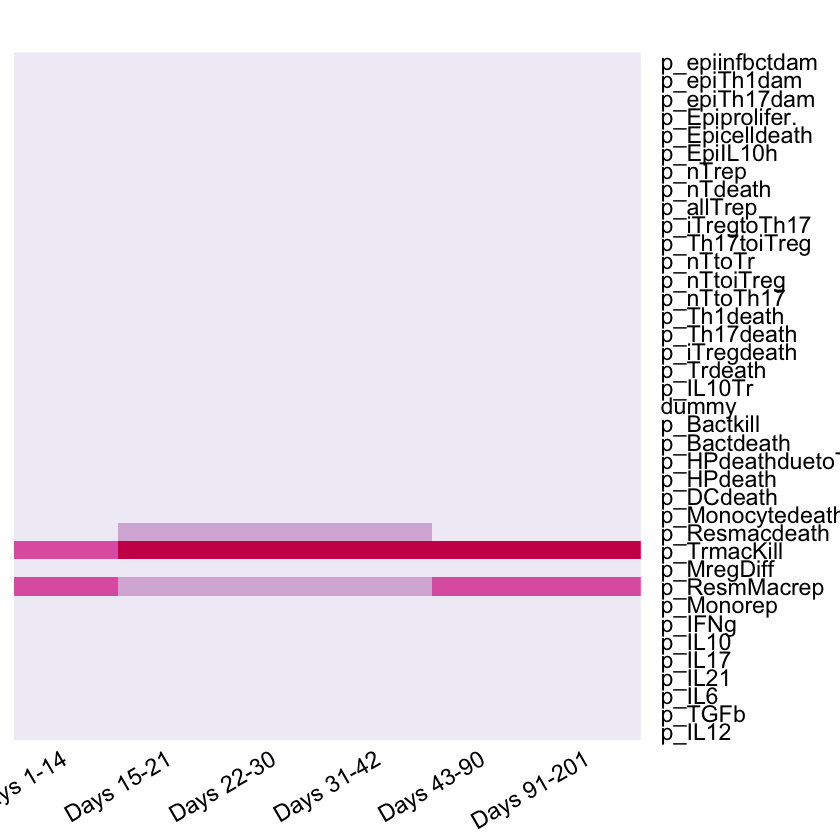

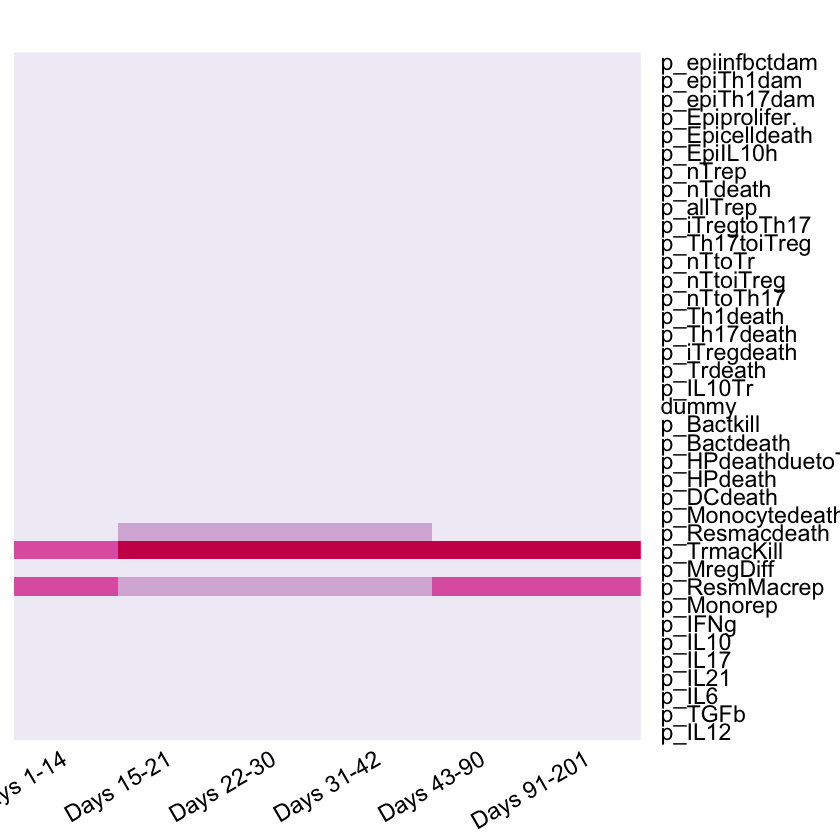

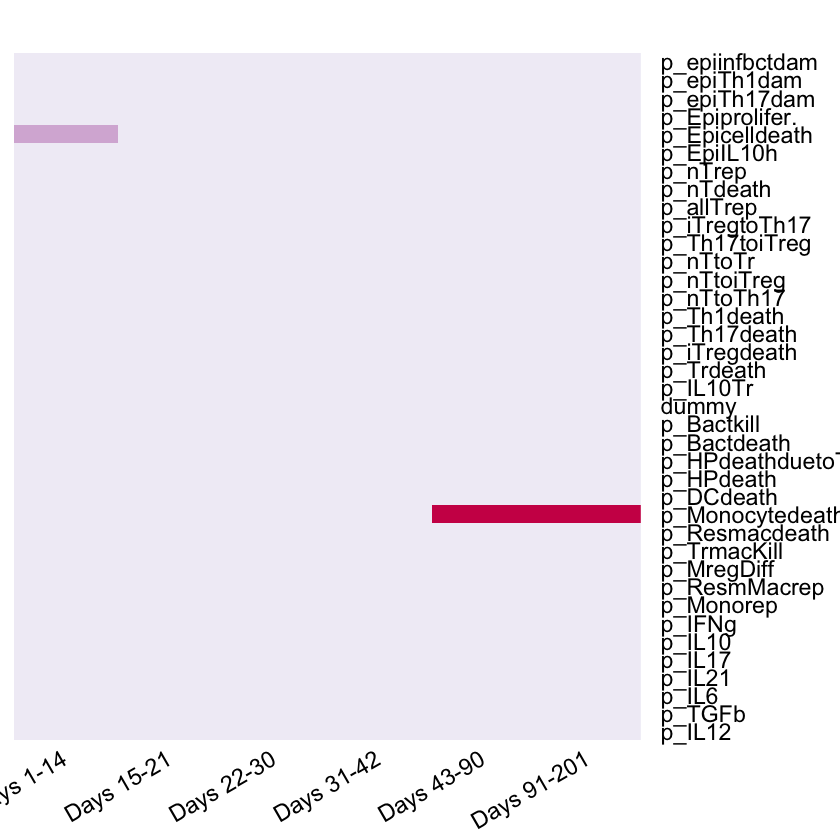

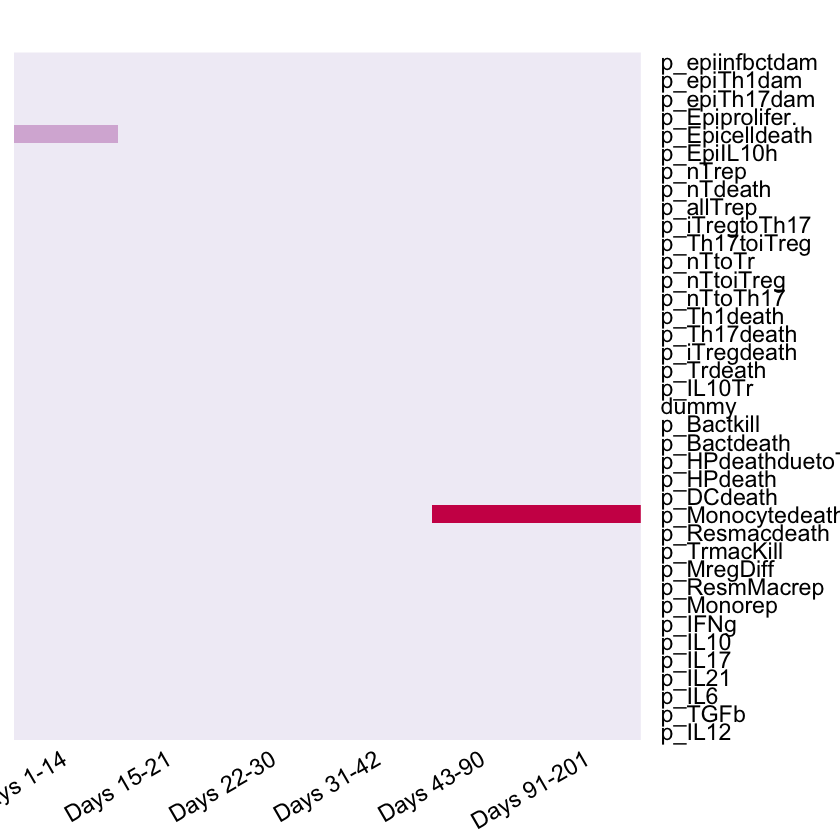

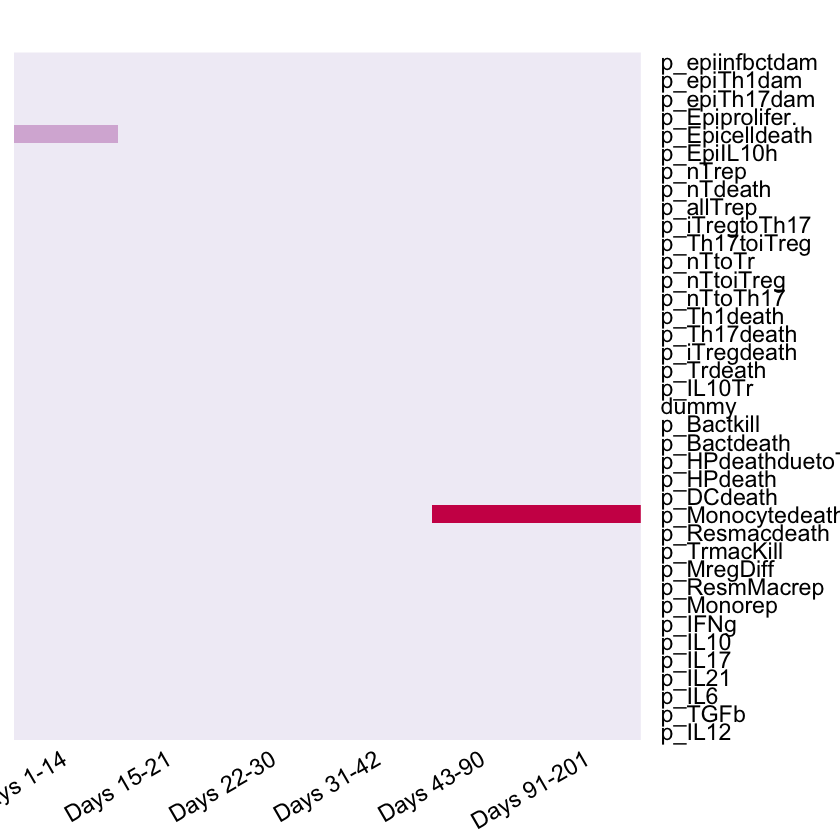

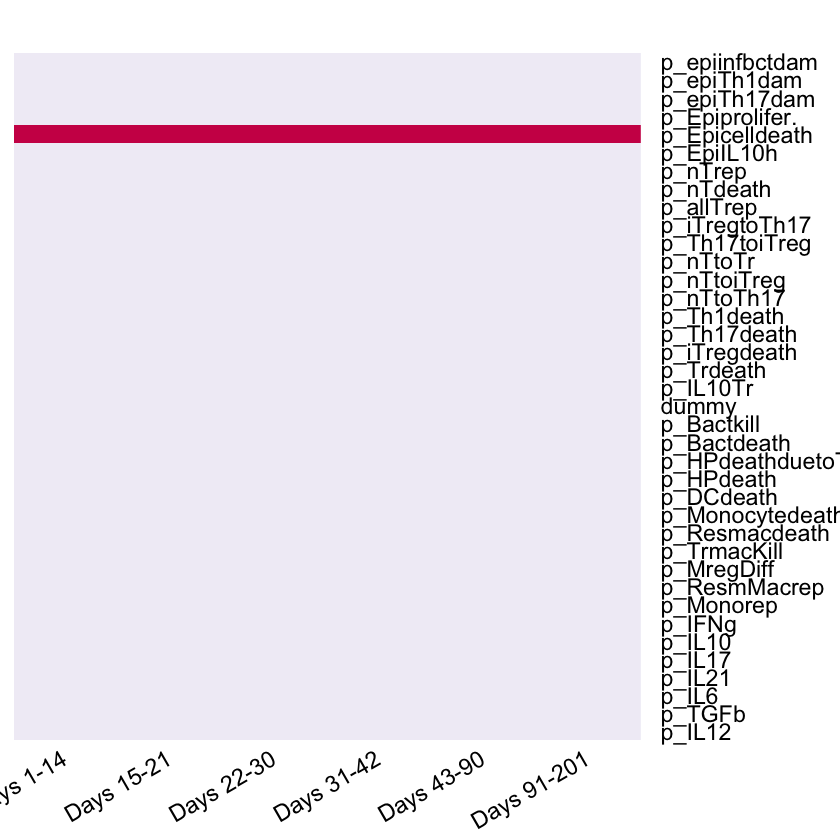

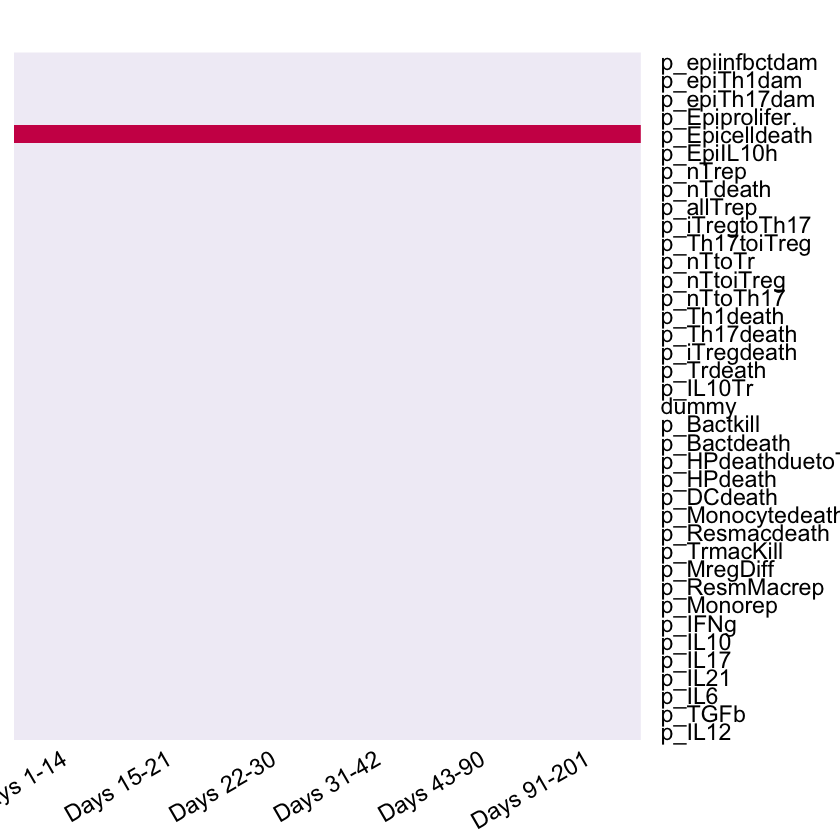

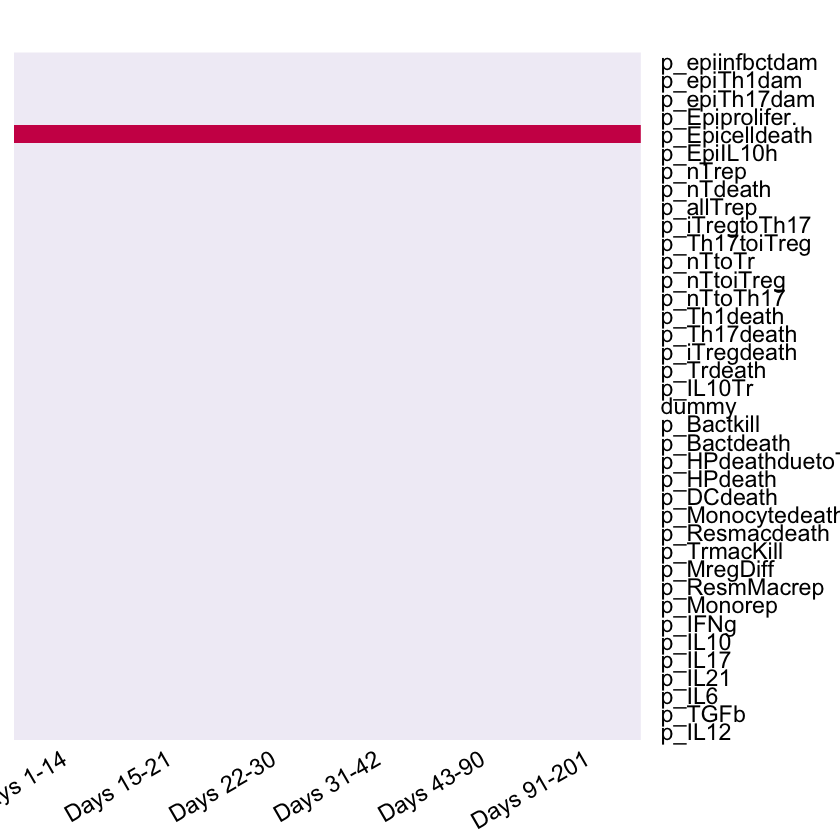

In [3]:
gl <- lapply(1:4, function(q){
  heatmap.2(t(data.frame(apply(arr[[q]], 2, function(x) as.numeric(as.character(x))))), dendrogram ='none',
            col=brewer.pal(n = 4, name = "PuRd"), 
            key=FALSE, symkey=FALSE, density.info='none',
            trace='none', Rowv=FALSE, Colv=FALSE,
            scale="none",cexRow=1.4,cexCol=1.4, labRow = label,srtCol=30,
            labCol = c ("Days 1-14", "Days 15-21", "Days 22-30","Days 31-42","Days 43-90", "Days 91-201"),                 
            lmat = rbind(c(4,3),c(2,1)), lwid = c(0.1,6), lhei = c(0.5,7.5), 
            margins = c(5,10)
  )
  grab_grob()
})



In [4]:
grid.newpage()
library(gridExtra)
pdf("Fig4.pdf", 25,20)
#par(oma=c(1,5,1,1))
p<- grid.arrange(grobs=gl, ncol=2,widths=unit(c(12,12),c("in","in")), heights=unit(c(9,9),c("in","in")), clip=TRUE)
dev.off()

Warning message:
“package ‘gridExtra’ was built under R version 3.3.2”

pdf 
  2

In [5]:
system(paste0('open "', "Fig4.pdf", '"'))